In [13]:
# Import necessary libraries

import os

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine, text

pd.set_option("display.max_columns", None)

In [14]:
# Load environment variables from .env file

from dotenv import load_dotenv

load_dotenv()

True

In [15]:
# Connect to Postgres

POSTGRES_USER = os.getenv("POSTGRES_USER")
POSTGRES_PASSWORD = os.getenv("POSTGRES_PASSWORD")
POSTGRES_DB = os.getenv("POSTGRES_DB")
POSTGRES_PORT = os.getenv("POSTGRES_PORT", 5432)
POSTGRES_HOST = "localhost"


connection_string = f"postgresql://{POSTGRES_USER}:{POSTGRES_PASSWORD}@{POSTGRES_HOST}:{POSTGRES_PORT}/{POSTGRES_DB}"
engine = create_engine(connection_string)

In [16]:
# Import queries

with open(
    "/Users/anthony/Documents/GitHub/f1data/piastri/docs/analysis_denormalized.sql", "r"
) as file:
    sql_queries = file.read()

queries = sql_queries.split(";")
sql_temp = queries[0].strip()
sql_quali = queries[1].strip()
sql_race = queries[2].strip()

In [18]:
# Run queries to create DataFrames

with engine.connect() as connection:
    connection.execute(text(sql_temp))
    connection.commit()

    df_quali = pd.read_sql_query(text(sql_quali), engine)
    df_race = pd.read_sql_query(text(sql_race), engine)

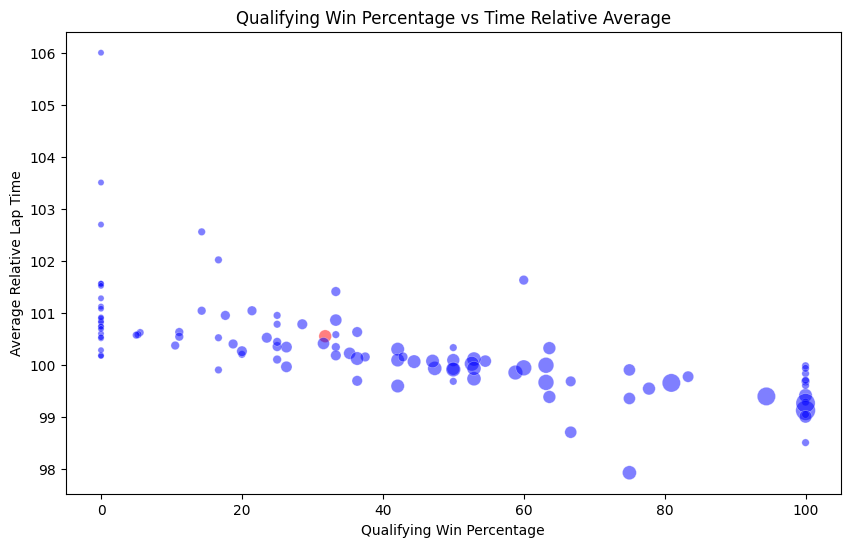

In [9]:
# Plot qualifying data

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_quali,
    x="quali_win_pct",
    y="time_relative_avg",
    size="quali_win_total",
    sizes=(20, 200),
    hue=(df_quali["id_rookie"] == "piastri"),
    palette={True: "red", False: "blue"},
    legend=False,
    alpha=0.5,
)

plt.xlabel("Qualifying Win Percentage")
plt.ylabel("Average Relative Lap Time")
plt.title("Qualifying Win Percentage vs Time Relative Average")

# Show plot
plt.show()

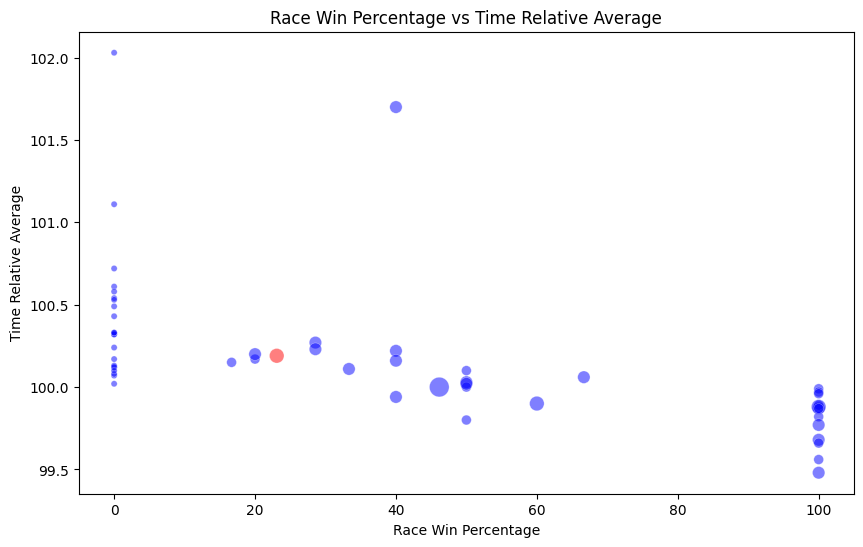

In [ ]:
# Plot race data

plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=df_race,
    x="race_win_pct",
    y="time_relative_avg",
    size="race_win_total",
    sizes=(20, 200),
    hue=(df_race["id_rookie"] == "piastri"),
    palette={True: "red", False: "blue"},
    legend=False,
    alpha=0.5,
)

plt.xlabel("Race Win Percentage")
plt.ylabel("Time Relative Average")
plt.title("Race Win Percentage vs Time Relative Average")

# Show plot
plt.show()

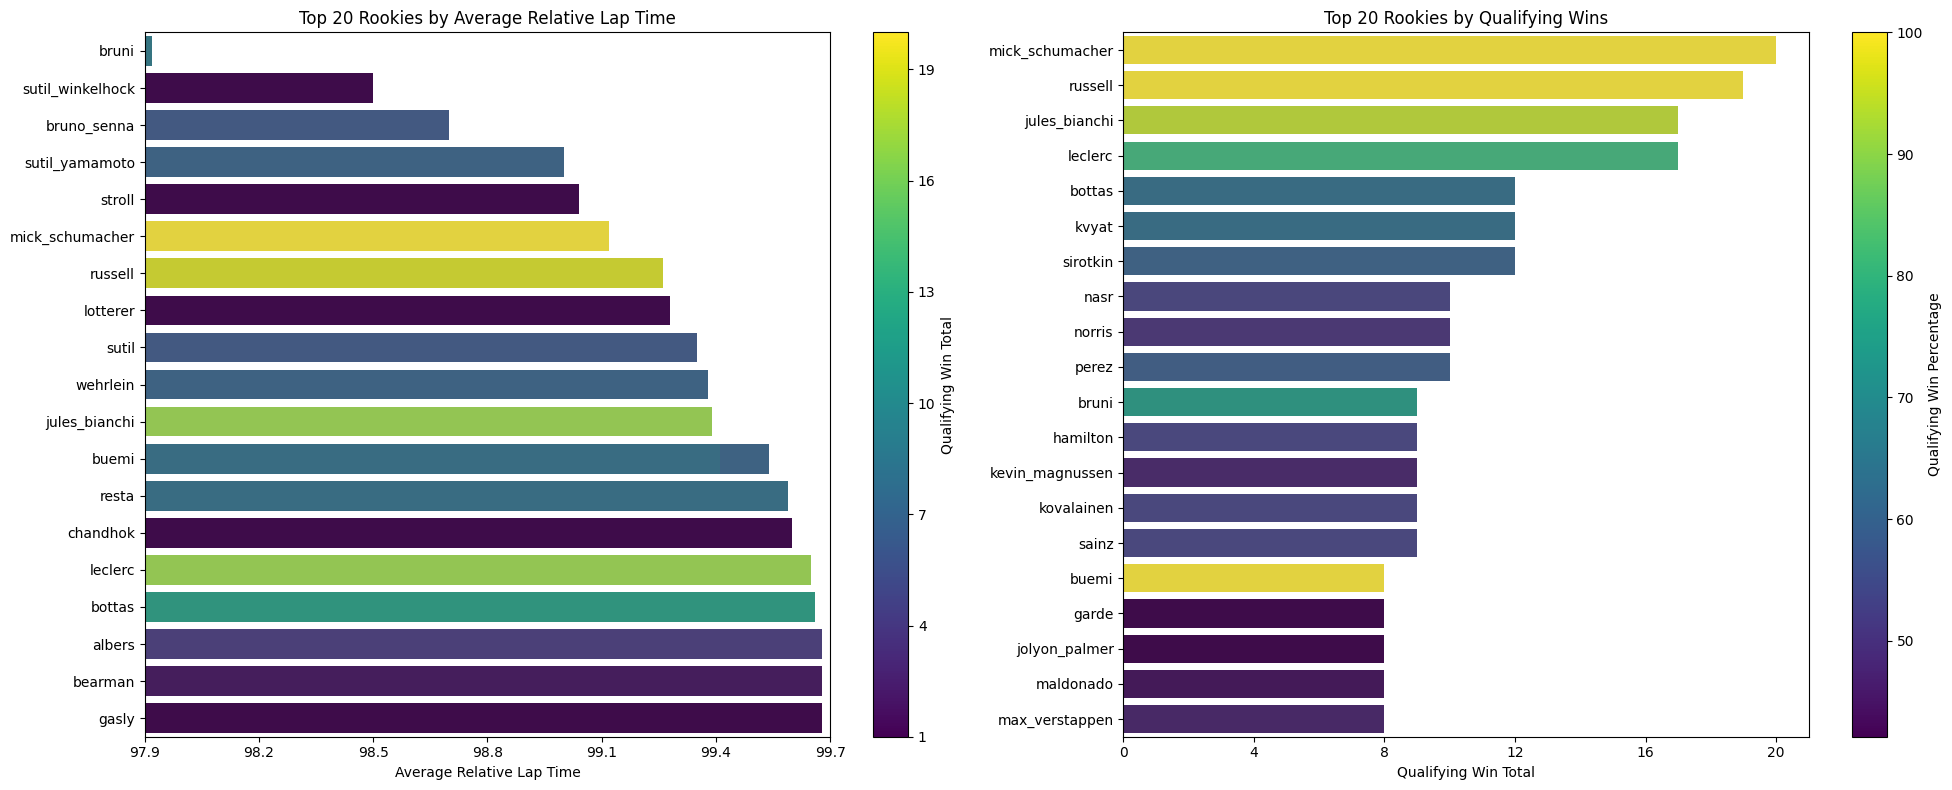

In [ ]:
def frange(start, stop, step):
    while start < stop:
        yield start
        start += step


# Create DataFrames for each ranking
top_quali_win_total = df_quali.nlargest(20, "quali_win_total")
top_time_relative_avg = df_quali.nsmallest(20, "time_relative_avg")

top_time_relative_avg.loc[
    top_time_relative_avg[top_time_relative_avg["id_rookie"] == "sutil"].index[0],
    "id_rookie",
] = "sutil_winkelhock"
top_time_relative_avg.loc[
    top_time_relative_avg[top_time_relative_avg["id_rookie"] == "sutil"].index[0],
    "id_rookie",
] = "sutil_yamamoto"

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot top rookies by time_relative_avg
sns.barplot(
    x="time_relative_avg",
    y="id_rookie",
    data=top_time_relative_avg,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="quali_win_total",
    dodge=False,
    ax=axes[0],
)
axes[0].set_title("Top 20 Rookies by Average Relative Lap Time")
axes[0].set_xlabel("Average Relative Lap Time")
axes[0].set_ylabel("")
axes[0].legend().remove()

# Add color bar for the second plot
norm = plt.Normalize(
    top_time_relative_avg["quali_win_total"].min(),
    top_time_relative_avg["quali_win_total"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(
    sm, ax=axes[0], orientation="vertical", label="Qualifying Win Total"
)

# Set color bar ticks and labels to increment by 4
cbar_ticks = range(
    int(top_time_relative_avg["quali_win_total"].min()),
    int(top_time_relative_avg["quali_win_total"].max()) + 1,
    3,
)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)

axes[0].set_xlim(97.9, 99.7)
xticks = [round(x, 1) for x in list(frange(97.9, 99.7, 0.3))]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticks)

# Plot top rookies by quali_win_total
sns.barplot(
    x="quali_win_total",
    y="id_rookie",
    data=top_quali_win_total,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="quali_win_pct",
    dodge=False,
    ax=axes[1],
)
axes[1].set_title("Top 20 Rookies by Qualifying Wins")
axes[1].set_xlabel("Qualifying Win Total")
axes[1].set_ylabel("")
axes[1].legend().remove()

# Add color bar for the first plot
norm = plt.Normalize(
    top_quali_win_total["quali_win_pct"].min(),
    top_quali_win_total["quali_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[1], orientation="vertical", label="Qualifying Win Percentage")

xticks = range(
    0,
    int(top_quali_win_total["quali_win_total"].max()) + 1,
    4,
)
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticks)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [80]:
df_race.nsmallest(20, "time_relative_avg")

,id_rookie,name_rookie_last,name_rookie_first,name_team,id_teammate,name_teammate_last,name_teammate_first,year,time_relative_avg,race_win_total,race_win_pct
32,mick_schumacher,Schumacher,Mick,Haas F1 Team,mazepin,Mazepin,Nikita,2021,99.48,2,100.00
36,perez,Perez,Sergio,Sauber,kobayashi,Kobayashi,Kamui,2011,99.56,1,100.00
51,vettel,Vettel,Sebastian,Toro Rosso,liuzzi,Liuzzi,Vitantonio,2007,99.66,1,100.00
16,jules_bianchi,Bianchi,Jules,Marussia,chilton,Chilton,Max,2013,99.68,2,100.00
29,matta,da Matta,Cristiano,Toyota,panis,Panis,Olivier,2003,99.77,2,100.00
21,kubica,Kubica,Robert,BMW Sauber,heidfeld,Heidfeld,Nick,2006,99.80,1,50.00
27,maldonado,Maldonado,Pastor,Williams,barrichello,Barrichello,Rubens,2011,99.82,1,100.00
7,buemi,Buemi,Sébastien,Toro Rosso,bourdais,Bourdais,Sébastien,2009,99.87,2,100.00
35,ocon,Ocon,Esteban,Marussia,wehrlein,Wehrlein,Pascal,2016,99.87,1,100.00
30,max_verstappen,Verstappen,Max,Toro Rosso,sainz,Sainz,Carlos,2015,99.88,3,100.00


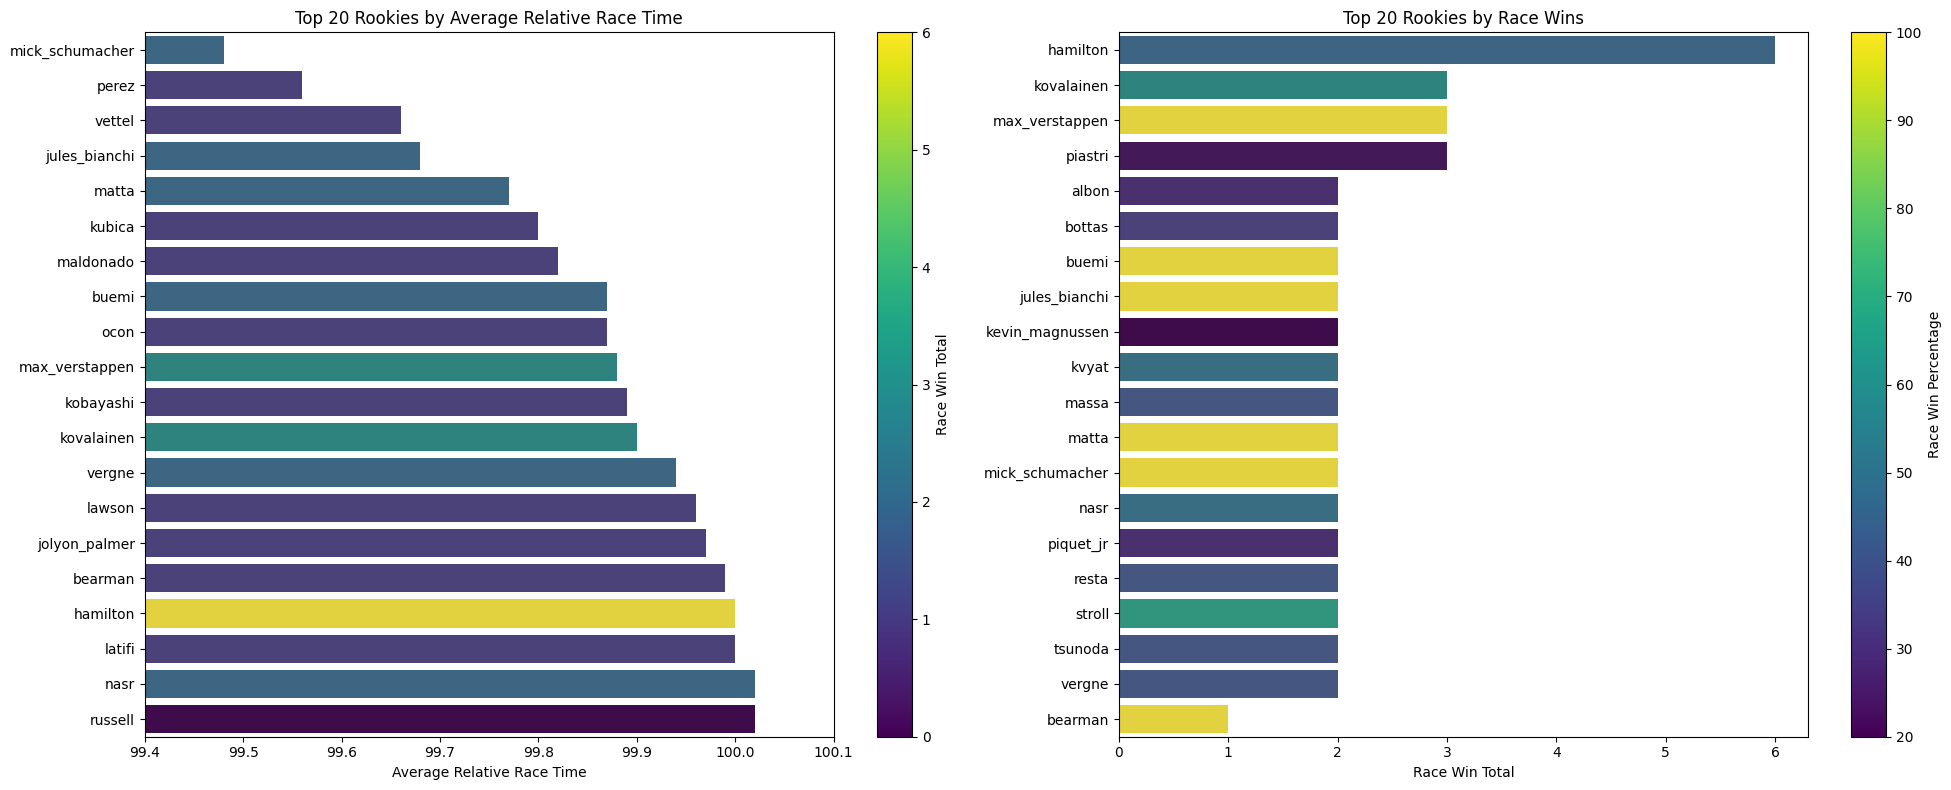

In [85]:
# Create DataFrames for each ranking
top_race_win_total = df_race.nlargest(20, "race_win_total")
top_time_relative_avg = df_race.nsmallest(20, "time_relative_avg")

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Plot top rookies by time_relative_avg
sns.barplot(
    x="time_relative_avg",
    y="id_rookie",
    data=top_time_relative_avg,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="race_win_total",
    dodge=False,
    ax=axes[0],
)
axes[0].set_title("Top 20 Rookies by Average Relative Race Time")
axes[0].set_xlabel("Average Relative Race Time")
axes[0].set_ylabel("")
axes[0].legend().remove()

# Add color bar for the second plot
norm = plt.Normalize(
    top_time_relative_avg["race_win_total"].min(),
    top_time_relative_avg["race_win_total"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=axes[0], orientation="vertical", label="Race Win Total")

# Set color bar ticks and labels to increment by 4
cbar_ticks = range(
    int(top_time_relative_avg["race_win_total"].min()),
    int(top_time_relative_avg["race_win_total"].max()) + 1,
    1,
)
cbar.set_ticks(cbar_ticks)
cbar.set_ticklabels(cbar_ticks)

axes[0].set_xlim(99.4, 100.1)
xticks = [round(x, 1) for x in list(frange(99.4, 100.1, 0.1))]
axes[0].set_xticks(xticks)
axes[0].set_xticklabels(xticks)

# Plot top rookies by race_win_total
sns.barplot(
    x="race_win_total",
    y="id_rookie",
    data=top_race_win_total,
    palette=sns.color_palette("viridis", as_cmap=True),
    hue="race_win_pct",
    dodge=False,
    ax=axes[1],
)
axes[1].set_title("Top 20 Rookies by Race Wins")
axes[1].set_xlabel("Race Win Total")
axes[1].set_ylabel("")
axes[1].legend().remove()

# Add color bar for the first plot
norm = plt.Normalize(
    top_race_win_total["race_win_pct"].min(),
    top_race_win_total["race_win_pct"].max(),
)
sm = plt.cm.ScalarMappable(cmap="viridis", norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=axes[1], orientation="vertical", label="Race Win Percentage")

xticks = range(
    0,
    int(top_race_win_total["race_win_total"].max()) + 1,
    1,
)
axes[1].set_xticks(xticks)
axes[1].set_xticklabels(xticks)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()